In [4]:
import pandas as pd
import numpy as np
import pickle 
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from textblob import TextBlob
import seaborn as sns
import random

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 280)

football_feed_df = pd.read_csv('football_feed_df.csv')
print(football_feed_df.columns)
football_feed_df.head()

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1',
       'created_at', 'id', 'id_str', 'text', 'truncated', 'entities',
       'metadata', 'source', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'geo',
       'coordinates', 'place', 'contributors', 'is_quote_status',
       'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'lang',
       'team', 'user_id', 'possibly_sensitive', 'retweeted_status_id',
       'extended_entities', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status', 'hashtags', 'user_mentions', 'emoji', 'processed_text',
       'full_text', 'display_text_range'],
      dtype='object')


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,team,user_id,possibly_sensitive,retweeted_status_id,extended_entities,quoted_status_id,quoted_status_id_str,quoted_status,hashtags,user_mentions,emoji,processed_text,full_text,display_text_range
0,0,0,0,0.0,Thu Nov 12 20:34:18 +0000 2020,1326986703228186624,1326986703228186624,Enter for your chance to win a Packers Salute to Service prize package!,False,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}","{'iso_language_code': 'en', 'result_type': 'recent'}","<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0,0,False,False,en,Packers,227741667,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,[],Enter chance win Packers Salute Service prize package !,Enter for your chance to win a Packers Salute to Service prize package!,NaN
1,1,1,1,1.0,Thu Nov 12 20:34:05 +0000 2020,1326986645300801541,1326986645300801541,.meets with the media on Thursday as the #Packers prepare for the Jaguars 🎥,False,"{'hashtags': [{'text': 'Packers', 'indices': [68, 76]}], 'symbols': [], 'user_mentions': [{'screen_name': 'packers', 'name': 'Green Bay Packers', 'id': 35865630, 'id_str': '35865630', 'indices': [3, 11]}, {'screen_name': '_SmashAmos31', 'name': 'Adrian Amos', 'id': 248086619,...","{'iso_language_code': 'en', 'result_type': 'recent'}","<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,6,0,False,False,en,Packers,1326876581147660289,False,1.326984e+18,NaN,NaN,NaN,NaN,"[{'text': 'Packers', 'indices': [68, 76]}]",Green Bay Packers,"[('🎥', ':movie_camera:')]",.meets medium Thursday # Packers prepare Jaguars 🎥,.meets with the media on Thursday as the #Packers prepare for the Jaguars 🎥,NaN
2,2,2,2,2.0,Thu Nov 12 20:33:50 +0000 2020,1326986583216697346,1326986583216697346,over 27-25\nover 36-32\nover 21-17\nover…,True,"{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'Colts', 'name': 'Indianapolis Colts', 'id': 180884045, 'id_str': '180884045', 'indices': [0, 6]}, {'screen_name': 'Titans', 'name': 'Tennessee Titans', 'id': 19383279, 'id_str': '19383279', 'indices': [12, 19]...","{'iso_language_code': 'nl', 'result_type': 'recent'}","<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",NaN,NaN,180884045.0,180884045.0,Colts,NaN,NaN,NaN,NaN,False,0,0,False,False,nl,Packers,1179783713342623744,NaN,NaN,NaN,NaN,NaN,NaN,[],Indianapolis Colts,[],27-25 36-32 21-17 over…,over 27-25\nover 36-32\nover 21-17\nover…,NaN
3,3,3,3,3.0,Thu Nov 12 20:33:38 +0000 2020,1326986533161873415,1326986533161873415,colts d or packers d,False,"{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': '1_and_only_arod', 'name': 'AR 🇩🇴', 'id': 818010236, 'id_str': '818010236', 'indices': [0, 16]}], 'urls': []}","{'iso_language_code': 'en', 'result_type': 'recent'}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,NaN,818010236.0,818010236.0,1_and_only_arod,NaN,NaN,NaN,NaN,False,0,0,False,False,en,Packers,2152753409,NaN,NaN,NaN,NaN,NaN,NaN,[],AR 🇩🇴,[],colt packer,colts d or packers d,NaN
4,4,4,4,4.0,Thu Nov 12 20:33:25 +0000 2020,1326986479667716102,1326986479667716102,"“Everyone knows he’s going to get the ball,” Jaguars coach Doug Marrone said in a conference call on Wednesday. “Yo…",True,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/lZ0aXbuSvn', 'expanded_url': 'https://twitter.com/i/web/status/1326986479667716102', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}","{'iso_language_code': 'en', 'result_type': 'recent'}","<a href=""https://m

In [6]:
football_feed_df.dtypes

Unnamed: 0                     int64
Unnamed: 0.1                   int64
Unnamed: 0.1.1                 int64
Unnamed: 0.1.1.1             float64
created_at                    object
id                             int64
id_str                         int64
text                          object
truncated                       bool
entities                      object
metadata                      object
source                        object
in_reply_to_status_id        float64
in_reply_to_status_id_str    float64
in_reply_to_user_id          float64
in_reply_to_user_id_str      float64
in_reply_to_screen_name       object
geo                           object
coordinates                   object
place                         object
contributors                 float64
is_quote_status                 bool
retweet_count                  int64
favorite_count                 int64
favorited                       bool
retweeted                       bool
lang                          object
t

In [7]:
#check to see how many repeat tweets we scraped. 

print(len(football_feed_df.full_text))
print(len(set(football_feed_df.full_text)))

4023
4023


In [8]:
#drop duplicate tweets 
football_feed_df.drop_duplicates(subset=['full_text'], inplace=True)
football_feed_df['team']= football_feed_df['team'].str.replace('DaBears', 'Bears')
football_feed_df['team'] = football_feed_df['team'].str.replace('ChiefsKingdom', 'Chiefs')

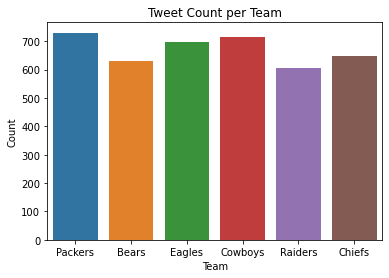

In [9]:
#check to make sure the number of tweets per team remains similar 
ax = sns.countplot(x = "team", data=football_feed_df)
ax.set(title = "Tweet Count per Team", xlabel = "Team", ylabel = "Count")
plt.show()

In [10]:
#shuffle the data 
np.random.seed(1)
df = football_feed_df.reindex(np.random.permutation(football_feed_df.index))

In [11]:
import re
contraction_patterns=[(r'can\'t', 'cannot'),
                    (r'haven\'t', 'have not'),
                    (r'(\w+)\'ll', '\g<1> will'),
                    (r'(\w+)\'re', '\g<1> are'),
                     (r'(\w+)\'ve', '\g<1> have'), 
                     (r'don\'t', 'do not')]

class contraction_replacer(object):
    def __init__(self, contraction_patterns):        
        # store compiled regex object
        self._contraction_regexes = [(re.compile(p), replaced_text) for p, replaced_text in contraction_patterns]
        
    def do_contraction_normalization(self, text):
        for contraction_regex, replaced_text in self._contraction_regexes:
            text = contraction_regex.sub(replaced_text, text)
        return text     
contraction_replacer = contraction_replacer(contraction_patterns)

In [12]:
def clean_tweet(tweet):
    btweet = contraction_replacer.do_contraction_normalization(tweet)
    wnetl = WordNetLemmatizer()
    ctweet = wnetl.lemmatize(btweet)
    word_regex= nltk.RegexpTokenizer(pattern=r'\w+', gaps=False)
    clean_tweet = word_regex.tokenize(ctweet)
    stopwords = nltk.corpus.stopwords.words('english')
    stop_clean_sent = [w for w in clean_tweet if w not in stopwords]
    return stop_clean_sent

In [13]:
football_feed_df["full_text"] = football_feed_df["full_text"].apply(str)
clean_football_tweets = football_feed_df["full_text"].apply(clean_tweet)
football_feed_df['tokens'] = football_feed_df["full_text"].apply(clean_tweet)
football_feed_df["text length"] = clean_football_tweets.apply(len)

clean_football_tweets[0:3]

0    [Enter, chance, win, Packers, Salute, Service, prize, package]
1               [meets, media, Thursday, Packers, prepare, Jaguars]
2                                          [27, 25, 36, 32, 21, 17]
Name: full_text, dtype: object

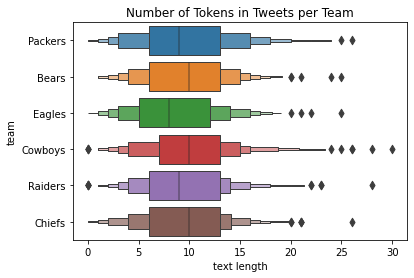

In [14]:
ax = sns.boxenplot(x=football_feed_df["text length"], y = football_feed_df["team"])
ax.set(title = "Number of Tokens in Tweets per Team")
plt.show()

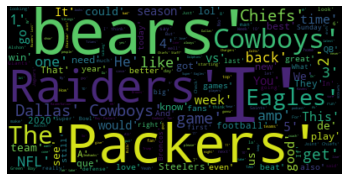

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

unique_string=(" ").join(map(str, clean_football_tweets))
wordcloud = WordCloud().generate(unique_string)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")


plt.show()

Packers


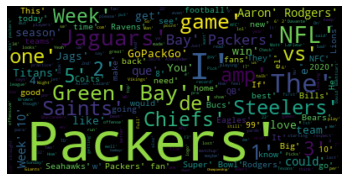

Bears


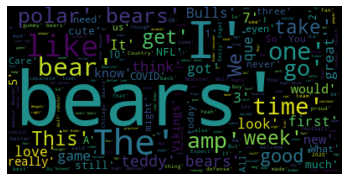

Eagles


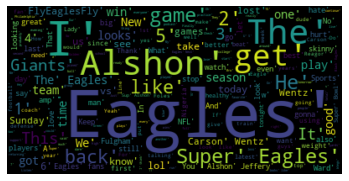

Cowboys


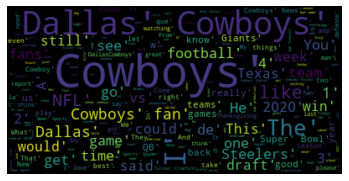

Raiders


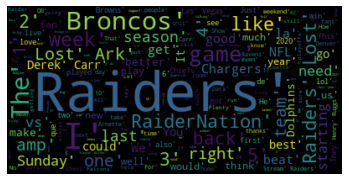

Chiefs


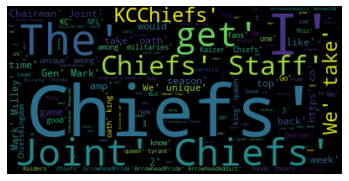

In [16]:
teams = ["Packers","Bears","Eagles", "Cowboys","Raiders", "Chiefs"]

for i in range(len(teams)):
    df = football_feed_df[football_feed_df['team']==teams[i]]
    print(teams[i])
    unique_string=(" ").join(map(str, df.tokens))
    wordcloud = WordCloud().generate(unique_string)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")


    plt.show()

# Naive Bayes Classifier

In [17]:
from nltk.corpus import twitter_samples

def get_tweets_for_model(cleaned_tokens_list):
    for tweet_tokens in cleaned_tokens_list:
        yield dict([token, True] for token in tweet_tokens) 
        
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')
text = twitter_samples.strings('tweets.20150430-223406.json')

In [18]:
clean_positive = pd.Series(positive_tweets).apply(clean_tweet)
clean_negative = pd.Series(negative_tweets).apply(clean_tweet)

clean_positive = get_tweets_for_model(clean_positive)
clean_negative = get_tweets_for_model(clean_negative)


In [19]:
positive_dataset = [(tweet_dict, 1)
                     for tweet_dict in clean_positive]

negative_dataset = [(tweet_dict, 0)
                     for tweet_dict in clean_negative]

dataset = positive_dataset + negative_dataset
random.shuffle(dataset)

train_data = dataset[:7000]
test_data = dataset[7000:]


In [20]:
from nltk import classify
from nltk import NaiveBayesClassifier
classifier = nltk.NaiveBayesClassifier.train(train_data)

print("Accuracy is:", classify.accuracy(classifier, test_data))

#print(classifier.show_most_informative_features(10))

Accuracy is: 0.7733333333333333


In [21]:
football_clean = get_tweets_for_model(clean_football_tweets)

football_dat = [(tweet_dict)
                     for tweet_dict in football_clean]

In [22]:
classifier.classify(football_dat[0])

#Classify each tweet one by one (not a vectorized process)
sentiment = []
for tweet in football_dat:
    s = classifier.classify(tweet)
    sentiment.append(s)

football_feed_df['sentiment'] = sentiment

In [23]:
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)

football_feed_df[['full_text', 'sentiment']]



,full_text,sentiment
0,Enter for your chance to win a Packers Salute to Service prize package!,0
1,.meets with the media on Thursday as the #Packers prepare for the Jaguars 🎥,1
2,over 27-25\nover 36-32\nover 21-17\nover…,1
3,colts d or packers d,0
4,"“Everyone knows he’s going to get the ball,” Jaguars coach Doug Marrone said in a conference call on Wednesday. “Yo…",1
...,...,...
4018,Dallas Cowboys/LA Lakers,0
4019,How many overall picks will the Dallas Cowboys own in the 2021 NFL draft?\n\n| #CowboysNation,0
4020,How many overall picks will the Dallas Cowboys own in the 2021 NFL draft?\n\n| #CowboysNation,0
4021,This player has really turned things around for the #DallasCowboys,0


## Read in Journalism Scrape

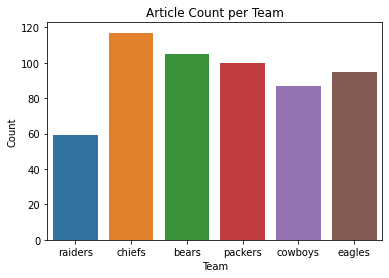

In [24]:
football_articles = pd.read_csv('sports_journalism.csv') #row 15 has text NAN
football_articles.isna().sum()

football_articles.dropna(subset=['Text'], inplace=True)
football_articles.isna().sum()#make sure there are no nans in txt or team 

#make sure team counts roughly even 
#check to make sure the number of tweets per team remains similar 
ax = sns.countplot(x = "Team", data=football_articles)
ax.set(title = "Article Count per Team", xlabel = "Team", ylabel = "Count")
plt.show()

In [25]:
#preprocess article text
article_tokens = football_articles["Text"].apply(clean_tweet)
football_articles["tokens"] = football_articles["Text"].apply(clean_tweet)
clean_article = get_tweets_for_model(article_tokens)

article_dat = [(art_dict)
                     for art_dict in clean_article]
#article_dat[0:3]

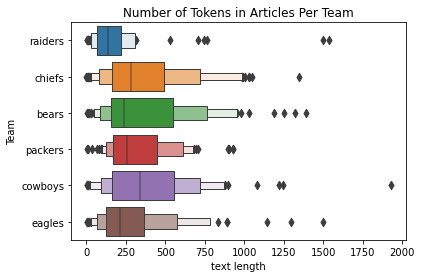

In [26]:
football_articles["text length"] = article_tokens.apply(len)
ax = sns.boxenplot(x=football_articles["text length"], y = football_articles["Team"])
ax.set(title = "Number of Tokens in Articles Per Team")
plt.show()

raiders


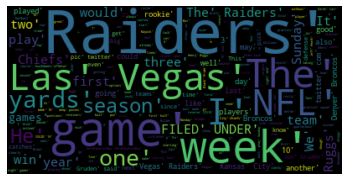

chiefs


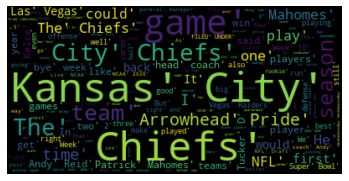

bears


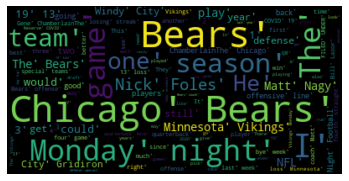

packers


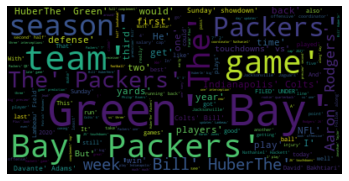

cowboys


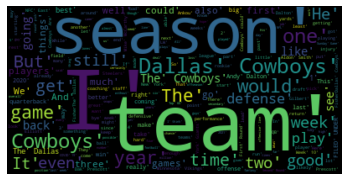

eagles


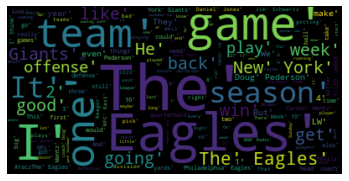

In [27]:
teams = ['raiders', 'chiefs', 'bears', 'packers', 'cowboys', 'eagles']

for i in range(len(teams)):
    df = football_articles[football_articles['Team']==teams[i]]
    print(teams[i])
    unique_string=(" ").join(map(str, df.tokens))
    wordcloud = WordCloud().generate(unique_string)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

    plt.show()

In [28]:
sentiment = []
for a in article_dat:
    s = classifier.classify(a)
    sentiment.append(s)

football_articles['sentiment'] = sentiment

In [29]:
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 50)

football_articles[['Text', 'sentiment']]

,Text,sentiment
0,Chiefs coach Andy Reid addresses the Raiders' ...,0
1,Patrick Mahomes is announced as a member of th...,1
2,Chicago native Michael Wilbon says Theo Epstei...,1
3,"GREEN BAY, Wis. -- It's not Marquez Valdes-Sca...",0
4,"FRISCO, Texas -- As the country experiences a ...",0
...,...,...
559,Just as we thought the Kansas City Chiefs were...,1
560,Tucker D. FranklinWhile there are many Kansas ...,1
561,Chiefs Chairman and CEO Clark Hunt's decision ...,1
562,TNS. FNLWatch!! Eifel Grand Prix Live Online: ...,1


In [30]:
##combine the sources 
football_feed_df['source'] = ['Twitter' for r in range(len(football_feed_df))]
football_articles['source'] = ['Web Article' for r in range(len(football_articles))]

football_articles.rename(columns={'Team': 'team', 'Text': 'full_text'}, inplace=True)
football_articles['team'] = football_articles['team'].str.capitalize()
total_df = pd.concat([football_feed_df[['full_text', 'team', 'source', 'sentiment']], football_articles[['full_text', 'team', 'source', 'sentiment']]])

print(total_df['team'].value_counts())

total_df

Packers    830
Cowboys    801
Eagles     792
Chiefs     765
Bears      734
Raiders    664
Name: team, dtype: int64


,full_text,team,source,sentiment
0,Enter for your chance to win a Packers Salute ...,Packers,Twitter,0
1,.meets with the media on Thursday as the #Pac...,Packers,Twitter,1
2,over 27-25\nover 36-32\nover 21-17\nover…,Packers,Twitter,1
3,colts d or packers d,Packers,Twitter,0
4,"“Everyone knows he’s going to get the ball,” J...",Packers,Twitter,1
...,...,...,...,...
559,Just as we thought the Kansas City Chiefs were...,Chiefs,Web Article,1
560,Tucker D. FranklinWhile there are many Kansas ...,Chiefs,Web Article,1
561,Chiefs Chairman and CEO Clark Hunt's decision ...,Chiefs,Web Article,1
562,TNS. FNLWatch!! Eifel Grand Prix Live Online: ...,Chiefs,Web Article,1


In [35]:
df_team_and_source = pd.DataFrame(total_df.groupby(['team', 'source'])['sentiment'].mean()).reset_index()
df_team = pd.DataFrame(df_team_and_source.groupby('team')['sentiment'].mean()).reset_index() #averages twitter and article sentiment

team
Bears      0.642456
Chiefs     0.683345
Cowboys    0.590215
Eagles     0.606570
Packers    0.649795
Raiders    0.596624
Name: sentiment, dtype: float64

,team,sentiment
1,Chiefs,0.600000
3,Eagles,0.555556
5,Raiders,0.543675
4,Packers,0.543373
0,Bears,0.536785
2,Cowboys,0.494382


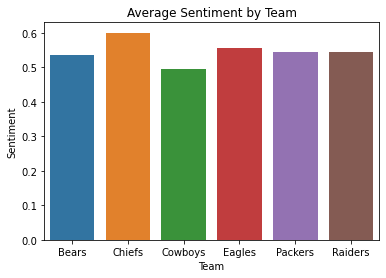

In [41]:
#group by teams
fig, ax = plt.subplots()
#df_team = pd.DataFrame(total_df.groupby('team')['sentiment'].mean()).reset_index()
ax = sns.barplot(x = "team", y = "sentiment", data = df_team)
ax.set(title="Average Sentiment by Team", 
        xlabel="Team",
        ylabel="Sentiment")
df_team.sort_values('sentiment', ascending=False)

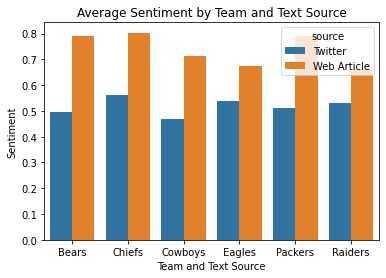

In [32]:
fig, ax = plt.subplots()
df_team_and_source = pd.DataFrame(total_df.groupby(['team', 'source'])['sentiment'].mean()).reset_index()
ax = sns.barplot(x = "team", hue = "source", y = "sentiment", data = df_team_and_source)
ax.set(title="Average Sentiment by Team and Text Source", 
        xlabel="Team and Text Source",
        ylabel="Sentiment")
plt.show()
#total_df.groupby(['team', 'source'])['sentiment'].mean()

source
Twitter        0.517027
Web Article    0.747780
Name: sentiment, dtype: float64

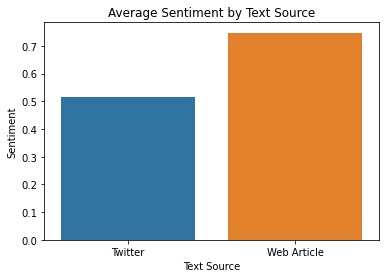

In [33]:
fig, ax = plt.subplots()
df_source = pd.DataFrame(total_df.groupby(['source'])['sentiment'].mean()).reset_index()
ax = sns.barplot(x = "source", y = "sentiment", data = df_source)
ax.set(title="Average Sentiment by Text Source", 
        xlabel="Text Source",
        ylabel="Sentiment")
total_df.groupby(['source'])['sentiment'].mean()